# Task 1:

- Apply Simple Linear Regression and Multiple Linear Regression on sales dataset to test which model is making more Accurate predictions.

# Importing Libraries 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [7]:
dataset = pd.read_csv("advertising.csv")
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Pre-Processing

In [8]:
dataset.shape

(200, 4)

In [9]:
# Checking for missing values
dataset.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
#Checking for duplicate rows
dataset.duplicated().any()

False

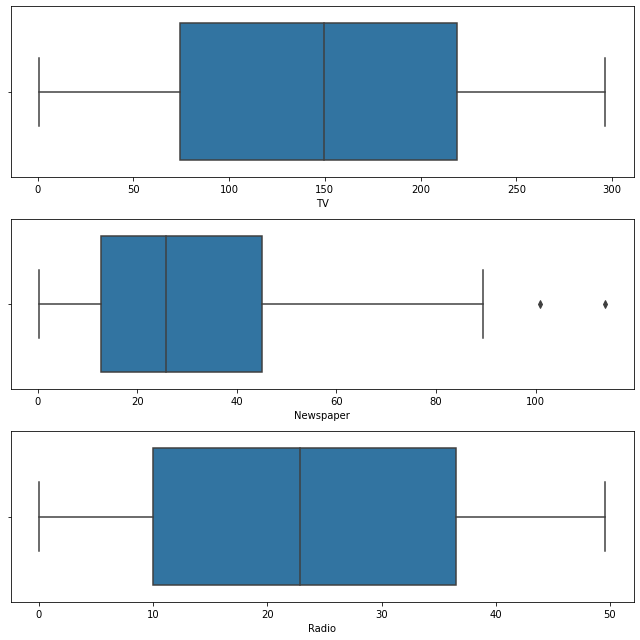

In [12]:
#Checking for outliers
fig, axs = plt.subplots(3, figsize = (9,9))
plt1 = sns.boxplot(dataset['TV'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio'], ax = axs[2])
plt.tight_layout()

# Exploratory Data Analysis

<AxesSubplot:xlabel='Sales', ylabel='Density'>

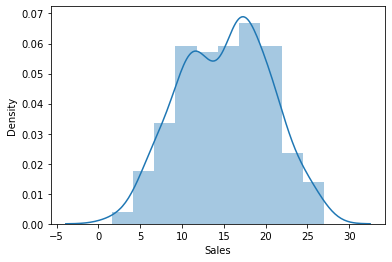

In [13]:
#Distribution of the target variable
sns.distplot(dataset['Sales'])

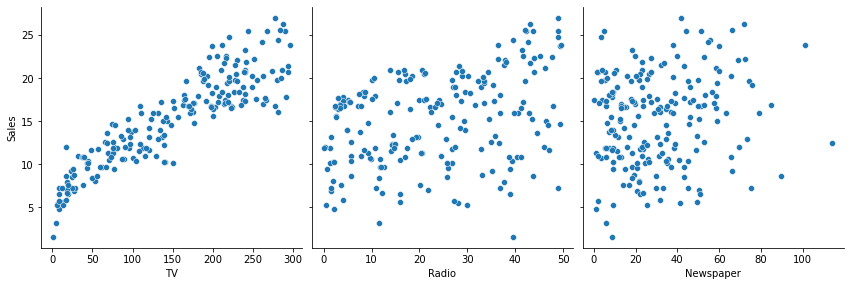

In [17]:
#How Sales are related with other variables
sns.pairplot(dataset, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

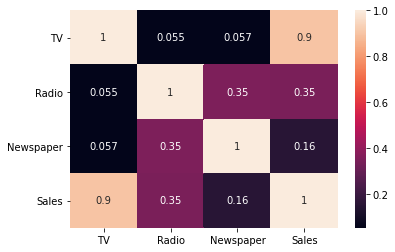

In [18]:
#Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Linear Regression

In [20]:
#Setting the value for X and Y
x = dataset[['TV']]
y = dataset['Sales']

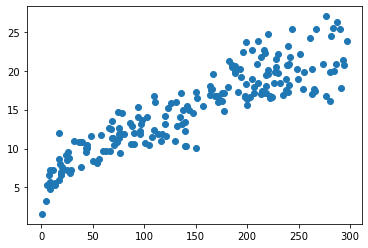

In [22]:
#Visualizing X and Y
plt.scatter(x, y)
plt.show()

In [23]:
#Splitting into testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [24]:
#Traing Model
model = LinearRegression()
model.fit(x_train, y_train) 

LinearRegression()

In [25]:
#Printing the model coefficients
print('Intercept: ', model.intercept_)
print('Coefficient:', model.coef_)

Intercept:  7.007108428241851
Coefficient: [0.05548294]


In [26]:
print('Regression Equation: Sales = 7.007108428241851 + 0.05548294 * TV')

Regression Equation: Sales = 7.007108428241851 + 0.05548294 * TV


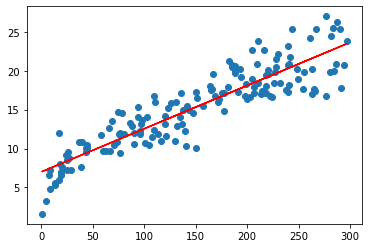

In [27]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 7.007108428241851 + 0.05548294*x_train, 'r')
plt.show()

In [31]:
#Prediction of Test and Training set result  
y_pred = model.predict(x_test)    

In [32]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
slr_diff

,Actual value,Predicted value
95,16.9,16.067473
15,22.4,17.848476
30,21.4,23.258063
158,7.3,7.656259
128,24.7,19.230001
115,12.6,11.173878
69,22.3,19.035811
170,8.4,9.781256
174,16.5,19.346515
45,16.1,16.722172


In [33]:
#Predict for any value
model.predict([[56]])

array([10.11415329])

In [36]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(model.score(x,y)*100))

R squared value of the model: 81.21


**81.10 % of the data fit the regression model**

In [38]:
#Model Evaluation
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.9502948931650088
Mean Square Error: 6.101072906773964
Root Mean Square Error: 2.470035001123256


# Multiple Linear Regression

In [39]:
#Setting the value for X and Y
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [41]:
#Splitting into testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [42]:
#Traing Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
#Printing the model coefficients
print('Intercept: ', model.intercept_)
print('Coefficient:', list(zip(x, model.coef_)))

Intercept:  4.714126402214134
Coefficient: [('TV', 0.05450927083721976), ('Radio', 0.10094536239295573), ('Newspaper', 0.004336646822034021)]


In [45]:
print('Multiple Regression Equation: Sales = 4.7141 + 0.0545 * TV +  0.1009 * Radio + 0.0043 * Newspaper')

Multiple Regression Equation: Sales = 4.7141 + 0.0545 * TV +  0.1009 * Radio + 0.0043 * Newspaper


In [46]:
#Prediction of Test and Training set result  
y_pred = model.predict(x_test)   

In [47]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff

,Actual value,Predicted value
95,16.9,17.034772
15,22.4,20.409740
30,21.4,23.723989
158,7.3,9.272785
128,24.7,21.682719
115,12.6,12.569402
69,22.3,21.081195
170,8.4,8.690350
174,16.5,17.237013
45,16.1,16.666575


In [49]:
#Predict for any value
model.predict([[56,22,21]])

array([10.07851313])

In [50]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(model.score(x,y)*100))

R squared value of the model: 90.20


**90.20 % of the data fit the regression model**

In [51]:
#Model Evaluation
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.274826210954934
Mean Square Error: 2.907756910271091
Root Mean Square Error: 1.7052146229349228


# Conclusion

**Multiple Regression Model is far more accurate than Simple Linear Regression Model**

# Task 2

- Apply Polynomial Regression and Support Vector Regression on Drugs Performance dataset to test which model is making more Accurate predictions.

# Reading Dataset

In [52]:
dataset = pd.read_csv("Drugs_Performance.csv")
dataset.head()

,Age,Drugs_Perf
0,1,1.166667
1,2,1.833333
2,3,2.833333
3,4,4.166667
4,5,5.833333


# Data Pre-Processing

In [53]:
dataset.shape

(84, 2)

In [54]:
#checking for missing values
dataset.isna().sum()

Age           0
Drugs_Perf    0
dtype: int64

In [55]:
#checking for duplicate rows
dataset.duplicated().any()

False

<AxesSubplot:xlabel='Age'>

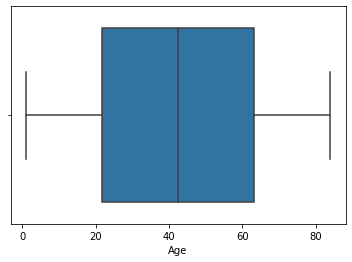

In [59]:
#checking for outliers
sns.boxplot(dataset['Age'])

# Exploratory Data Analysis

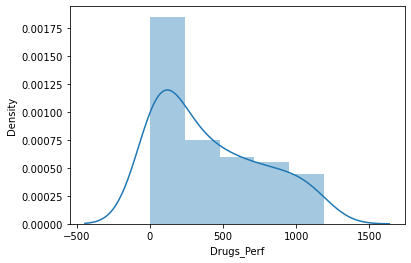

In [60]:
sns.distplot(dataset['Drugs_Perf']);

# Polynomial Regression

In [69]:
#importing libraries

from sklearn.preprocessing import PolynomialFeatures

In [65]:
#Setting the value for X and Y
x = dataset[["Age"]].values
y = dataset[["Drugs_Perf"]].values

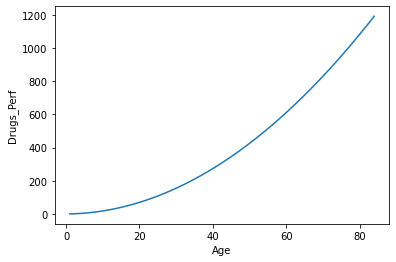

In [67]:
#Visualizing X and Y
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xlabel("Age")
plt.ylabel("Drugs_Perf")
plt.show()

In [68]:
#Splitting into testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [71]:
#Pre-processing
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x_train)
poly.fit(x_poly, y_train)

PolynomialFeatures()

In [73]:
#Traing Model
model = LinearRegression()
model.fit(x_poly,y_train)

LinearRegression()

In [76]:
#Printing the model coefficients
print('Intercept: ', model.intercept_)
print('Coefficient:', model.coef_)

Intercept:  [0.83333328]
Coefficient: [[0.         0.16666667 0.16666667]]


Text(0, 0.5, 'Drugs Performance')

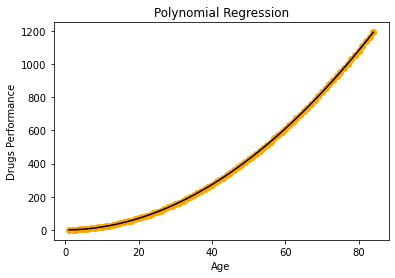

In [85]:
plt.scatter(x,y, color = 'orange')
plt.plot(x,model.predict(poly.fit_transform(x)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Drugs Performance')

In [ ]:
print('Prediction by the model:\t', model.predict(poly.fit_transform(x_test)))

# Support Vector Regression

In [79]:
#importing libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [80]:
#Setting the value for X and Y
x = dataset[["Age"]].values
y = dataset[["Drugs_Perf"]].values

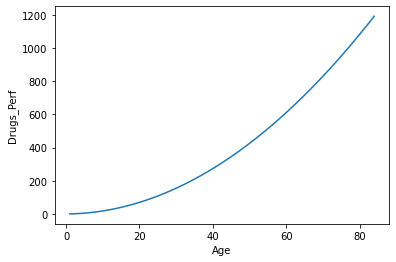

In [81]:
#Visualizing X and Y
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xlabel("Age")
plt.ylabel("Drugs_Perf")
plt.show()

In [87]:
#Scaling Features
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

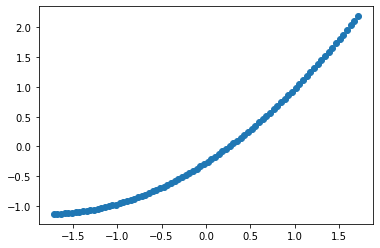

In [89]:
#Visualizing after scaling
plt.scatter(X, y)
plt.show()

In [90]:
#Training model
model = SVR(kernel = 'rbf')
model.fit(X,y)

SVR()

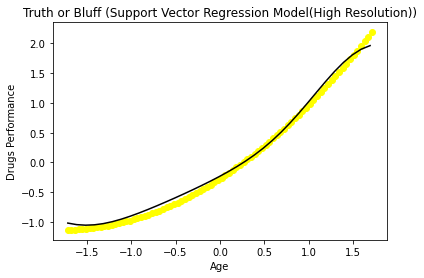

In [93]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = "yellow")
plt.plot(X_grid, model.predict(X_grid), color = "black")
plt.title("Truth or Bluff (Support Vector Regression Model(High Resolution))")
plt.xlabel("Age")
plt.ylabel("Drugs Performance")
plt.show()

In [94]:
y_pred = sc_y.inverse_transform ((model.predict(sc_X.transform(np.array([[10]])))))
y_pred

array([36.60927936])